In [ ]:
#conectamos con google drive para poder leer el fichero csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importaciones necesraias para hacer el ejercicio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import os
import random
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import WordPunctTokenizer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Leemos el fichero csv
df=pd.read_csv('/content/drive/MyDrive/AprendizajeAutomatico/Tweets.csv')
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#para ver cuantas filas y columnas tiene
df.shape

(14640, 15)

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# vemos cuantos valores nulos tenemos de cada variable
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Visualizando los datos llegamos la conclusion que la unicas dos columnas del dataset que nos interesan son text y airline_sentiment puesto que en la columna text nos proporciona los diferentes texto y la columna airline_sentiment si es neutral, positivo o negativo.

In [ ]:
#borramos las columnas que no nos hacen falta para el desarollo de la práctica
columnas_eliminadas = ['tweet_id', 'tweet_coord', 'airline_sentiment_gold', 'negativereason_gold']
df = df.drop(['tweet_id', 'airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline','airline_sentiment_gold', 'name', 'negativereason_gold',
'retweet_count', 'tweet_coord', 'tweet_created','tweet_location', 'user_timezone'], axis=1)

In [ ]:
#Comprobamos que se han eliminado las columnas
df.columns

Index(['airline_sentiment', 'text'], dtype='object')

Visualizacion de los datos

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


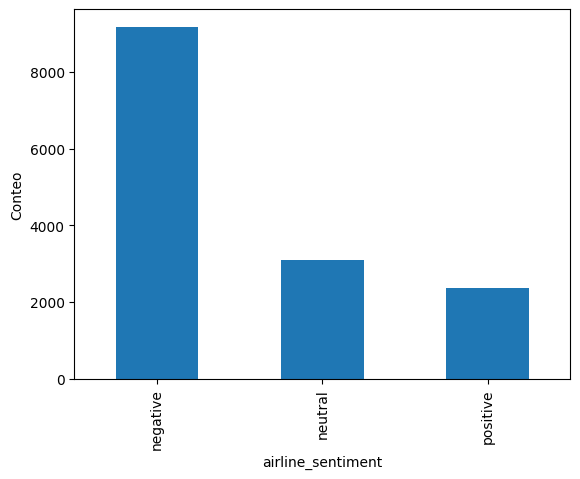

In [ ]:
# Análisis de la distribución de sentimientos en forma de gráfico de barras
sentiment_counts = df['airline_sentiment'].value_counts()
print(sentiment_counts)
sentiment_counts.plot(kind='bar')
plt.xlabel('airline_sentiment')
plt.ylabel('Conteo')
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, names='airline_sentiment', title ='Análisis de la distribución de sentimientos en forma de gráfico circular')
fig.show()

Ahoara vamos a tokenizar los textos(tweets), es decir,  vamos a dividir el texto en unidades más pequeñas, llamadas "tokens" que esto seran cada una de las palabras. La tokenización es un paso fundamental en muchos procesos de NLP porque permite que los algoritmos trabajen con unidades manejables del texto

In [ ]:
nltk.download('stopwords') #descargamos un conjunto de 'stopwords'
stopwords = stopwords.words('english') #inicializamos na lista de stopwords en inglés.
stemmer = SnowballStemmer('english') #inicializamos nn 'stemmer' para el inglés, que se usa para derivar palabras
tokenizer = WordPunctTokenizer() #inicializamos un tokenizador que divide el texto en palabras pero captura también la puntuación(puntos, comas ...),
#lo cual es bastante util para esta práctica ya que el objetivo es desarrollar un modelo NLP para clasificar correctamente estos tweets según el sentimiento expresado.
tags = r"@\w*" #buscamos coincidencias en una cadena de texto que comiencen con el carácter @ para eliminarlos ya que son etiquetas de personas en los teewts
# y no tiene importacia para el desarrolo de esta práctica

def tweet_to_words(sentence, stem = False):
    sentence = [re.sub(tags, "", sentence)]
    text = []
    for word in sentence:
        if word not in stopwords:
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize(" ".join(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Comprabamos que hemos tokenizado los tweet
print("\nOriginal tweet 1 ->", df['text'][1])
print("\nProcessed tweet 1 ->", tweet_to_words(df['text'][1]))

print("\nOriginal tweet 10 ->", df['text'][10])
print("\nProcessed tweet 10 ->", tweet_to_words(df['text'][10]))


Original tweet 1 -> @VirginAmerica plus you've added commercials to the experience... tacky.

Processed tweet 1 -> ['plus', 'you', "'", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']

Original tweet 10 -> @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24

Processed tweet 10 -> ['did', 'you', 'know', 'that', 'suicide', 'is', 'the', 'second', 'leading', 'cause', 'of', 'death', 'among', 'teens', '10', '-', '24']
